In [1]:
from astropy.io import ascii
from astropy.table import Table, Column, join
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
data1 = ascii.read('Data/data1.nzpcat', data_start = 0, header_start = 0, delimiter = ' ')
data2 = ascii.read('Data/data2.cat', data_start = 0, header_start = 0, delimiter = ' ')

In [3]:
print(data1)

   id      x       y         ra     ... flux_radius fwhm_image flags use
------- ------- ------- ----------- ... ----------- ---------- ----- ---
    1.0 14060.9  3510.6  53.0933075 ...       -99.0      -99.0    19   0
    2.0 14223.0  3258.3 53.09024811 ...       -99.0      -99.0     1   0
    3.0 14257.9  3347.6 53.08959198 ...       -99.0      -99.0     3   0
    4.0 14288.4  3438.2 53.08901596 ...       -99.0      -99.0     3   0
    5.0 13615.7  3298.2 53.10170746 ...       -99.0      -99.0     0   0
    6.0 13708.0  3309.3 53.09996796 ...       -99.0      -99.0     0   0
    7.0 14210.8  3266.1  53.0904808 ...       -99.0      -99.0     1   0
    ...     ...     ...         ... ...         ...        ...   ... ...
47972.0  9873.4 21394.9 53.17218399 ...       -99.0      -99.0     0   0
47973.0  9717.7 21441.1 53.17511368 ...       -99.0      -99.0     1   0
47974.0  9736.5 21440.0 53.17475891 ...       -99.0      -99.0     3   0
47975.0  9786.6 21440.9 53.17381668 ...       -99.0

In [6]:
print(data2)

  id      x         y         ra    ... nexp_f125w nexp_f140w nexp_f160w
----- --------- --------- --------- ... ---------- ---------- ----------
    1 11876.639   1632.89 53.093012 ...        4.0        0.0        4.0
    2 12056.715  1321.055 53.089613 ...        2.0        0.0        1.0
    3 11351.875  1327.244 53.102913 ...        1.0        0.0        1.0
    4 11415.681  1396.836 53.101709 ...        2.0        0.0        2.0
    5  11385.57  1384.729 53.102277 ...        2.0        0.0        2.0
    6 12005.665  1394.706 53.090577 ...        2.0        0.0        2.0
    7 11508.163  1409.004 53.099964 ...        2.0        0.0        2.0
  ...       ...       ...       ... ...        ...        ...        ...
50501  8601.418 18808.895 53.154725 ...        6.0        4.0        6.0
50502  7876.559  19063.41 53.168364 ...        6.0        0.0        6.0
50503  3207.811 18767.998 53.256225 ...       24.0        4.0       26.0
50504  3319.077 18889.404 53.254129 ...       24.0 

In [7]:
l1r = data1['ra']
l1d = data1['dec']
l2r = data2['ra']
l2d = data2['dec']

In [9]:
coords1 = SkyCoord(l1r, l1d, frame = 'icrs', unit = 'deg')
coords2 = SkyCoord(l2r, l2d, frame = 'icrs', unit = 'deg')
Id, dist, dummy = coords1.match_to_catalog_sky(coords2)
r = 0.4/3600
s = (dist > r*u.deg)
Id[s] = -99
cond_1 = (Id>0)
cond_2 = (data1['f_f160w'][cond_1] > 0)
y2 = -2.5*log10(data2['f_F160W'][Id][cond_1][cond_2]) + 25
y1 = -2.5*log10(data1['f_f160w'][cond_1][cond_2]) + 25

/tmp/ipykernel_27136/3537363808.py:9: RuntimeWarning: invalid value encountered in log10
  y2 = -2.5*log10(data2['f_F160W'][Id][cond_1][cond_2]) + 25


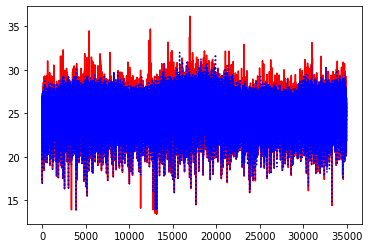

In [10]:
plt.plot(y1, "r-")
plt.plot(y2, "b:")

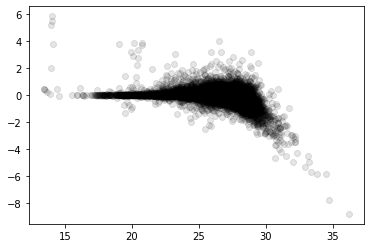

In [11]:
e = y2 - y1
plt.scatter(y1, e, c = "black", alpha = 0.1)